In [58]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

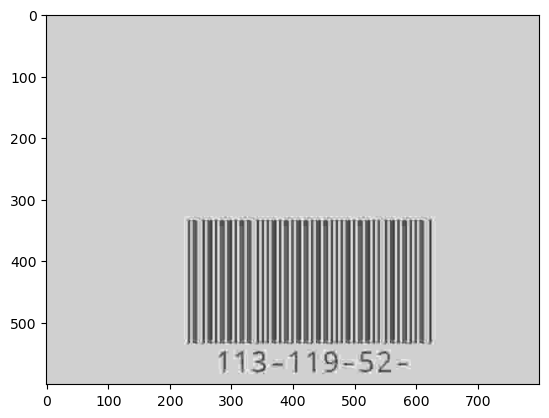

In [59]:
img = cv2.imread(r"C:\Users\USER\OneDrive\Desktop\CV Project\Test Cases\08 - compresso espresso.jpg")
plt.imshow(img , cmap='gray')
plt.show()

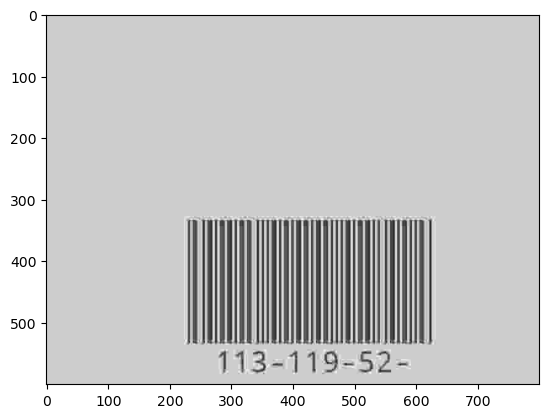

In [60]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

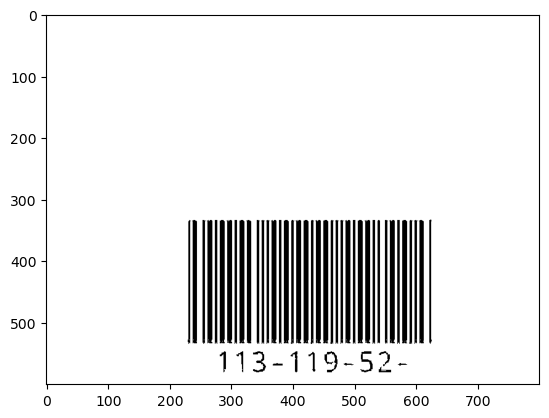

In [61]:
_, binary_image = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image,cmap='gray')

<function matplotlib.pyplot.show(close=None, block=None)>

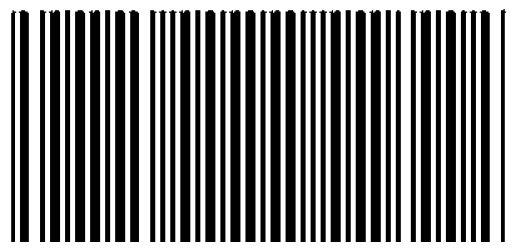

In [62]:
inverted_image = cv2.bitwise_not(binary_image)
x,y,w,h = cv2.boundingRect(inverted_image)
cropped_img = binary_image[y:y+h-h//4, x:x+w]
plt.imshow(cropped_img, cmap='gray')
plt.axis('off')
plt.show

In [64]:
# 0 means narrow, 1 means wide
NARROW = "0"
WIDE = "1"
code11_widths = {
    "00110": "Stop/Start",
    "10001": "1",
    "01001": "2",
    "11000": "3",
    "00101": "4",
    "10100": "5",
    "01100": "6",
    "00011": "7",
    "10010": "8",
    "10000": "9",
    "00001": "0",
    "00100": "-",
}

# Threshold the cropped image
mean = cropped_img.mean(axis=0)  # Column-wise mean
mean_binary = np.where(mean <= 127, 1, 0)  # Black or White

print("Mean Array (binary):", mean_binary)  # Check the binary output

# Convert to string of pixels in order to loop over it
pixels = ''.join(mean_binary.astype(np.uint8).astype(str))

# Analyze the bar widths
narrow_bar_size = 3  # Minimum size of narrow bar
wide_bar_size = 7    # Minimum size of wide bar

digits = []
pixel_index = 0
current_digit_widths = ""
skip_next = False

while pixel_index < len(pixels):

    if skip_next:
        # Skip over separator bar
        pixel_index += narrow_bar_size
        skip_next = False
        continue

    count = 1
    try:
        while pixels[pixel_index] == pixels[pixel_index + 1]:
            count += 1
            pixel_index += 1
    except:
        pass
    pixel_index += 1

    # Determine if the bar width is narrow or wide
    if 3 <= count <= 5:
        current_digit_widths += NARROW
    elif 7 <= count <= 9:
        current_digit_widths += WIDE

    # Check if current pattern matches a digit
    if current_digit_widths in code11_widths:
        digits.append(code11_widths[current_digit_widths])
        current_digit_widths = ""
        skip_next = True  # Next iteration will be a separator, so skip it

print(digits)


Mean Array (binary): [0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1
 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1
 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0]
['Stop/Start', '1', '1', '3', '-', '1', '1', '9', '-', '5', '2', '-', 'Stop/Start']
